# Project II
The purpose of this project is to explore the data that is given to us as an input. We are going to extract some information from the given table that is in crime.csv file and give some consludions.

In [1]:
import numpy as np
import pandas as pd
import os
import csv
import seaborn as sns #optional but nice to have!!!
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

To begin with, we open the file with pandas help. Data is our dataframe that contains all the information from crime.csv.
(The crime.csv file must be outside the file where this notibook is.)

In [7]:
path = os.path.abspath("crime.csv")
def my_open_file(path):
    df = pd.read_csv(path,encoding = "windows-1254",dtype={"INCIDENT_NUMBER": object, "OFFENCE_CODE": int, "OFFENSE_CODE_GROUP" : object, 
                                                           "OFFENSE_DESCRIPTION" : object, "DISTRICT" : object, "REPORTING_AREA" : object, 
                                                           "SHOOTING" : object, "OCCURRED_ON_DATE" : object, "YEAR" : int, "MONTH" : int,
                                                          "DAY_OF_WEEK" : object, "HOUR" : int, "UCR_PART" : object, "STREET" : object,
                                                          "Lat" : float, "Long" : float, "Location" : object})
    return df
data = my_open_file(path)

In [8]:
data.head()

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
0      I182080058          2403  Disorderly Conduct   
1      I182080053          3201       Property Lost   
2      I182080052          2647               Other   
3      I182080051           413  Aggravated Assault   
4      I182080050          3122            Aircraft   

              OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
0            DISTURBING THE PEACE      E18            495      NaN   
1                 PROPERTY - LOST      D14            795      NaN   
2       THREATS TO DO BODILY HARM       B2            329      NaN   
3  ASSAULT - AGGRAVATED - BATTERY       A1             92      NaN   
4              AIRCRAFT INCIDENTS       A7             36      NaN   

      OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART  \
0  2018-10-03 20:13:00  2018     10   Wednesday    20    Part Two   
1  2018-08-30 20:00:00  2018      8    Thursday    20  Part Three   
2  2018-10-03 19:20:00  2018     10   Wednesday    19    Part Two   
3  2018-10-03 20:00:00  2018     10   Wednesday    20    Part One   
4  2018-10-03 20:49:00  2018     10   Wednesday    20  Part Three   

         STREET        Lat       Long                     Location  
0  ARLINGTON ST  42.262608 -71.121186  (42.26260773, -71.12118637)  
1    ALLSTON ST  42.352111 -71.135311  (42.35211146, -71.13531147)  
2      DEVON ST  42.308126 -71.076930  (42.30812619, -71.07692974)  
3  CAMBRIDGE ST  42.359454 -71.059648  (42.35945371, -71.05964817)  
4   PRESCOTT ST  42.375258 -71.024663  (42.37525782, -71.02466343)

# Replacing the values that do not exist
As it is mentioned in our lectures, a value that does not exist can ,also be very important for our study and we have to consider it. In our case , we will replace the values that do not exist in SHOOTING columns with 'N' (None). 

In [9]:
data['SHOOTING'] = data['SHOOTING'].replace(np.nan, 'N')


In [10]:
data.head()

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
0      I182080058          2403  Disorderly Conduct   
1      I182080053          3201       Property Lost   
2      I182080052          2647               Other   
3      I182080051           413  Aggravated Assault   
4      I182080050          3122            Aircraft   

              OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
0            DISTURBING THE PEACE      E18            495        N   
1                 PROPERTY - LOST      D14            795        N   
2       THREATS TO DO BODILY HARM       B2            329        N   
3  ASSAULT - AGGRAVATED - BATTERY       A1             92        N   
4              AIRCRAFT INCIDENTS       A7             36        N   

      OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART  \
0  2018-10-03 20:13:00  2018     10   Wednesday    20    Part Two   
1  2018-08-30 20:00:00  2018      8    Thursday    20  Part Three   
2  2018-10-03 19:20:00  2018     10   Wednesday    19    Part Two   
3  2018-10-03 20:00:00  2018     10   Wednesday    20    Part One   
4  2018-10-03 20:49:00  2018     10   Wednesday    20  Part Three   

         STREET        Lat       Long                     Location  
0  ARLINGTON ST  42.262608 -71.121186  (42.26260773, -71.12118637)  
1    ALLSTON ST  42.352111 -71.135311  (42.35211146, -71.13531147)  
2      DEVON ST  42.308126 -71.076930  (42.30812619, -71.07692974)  
3  CAMBRIDGE ST  42.359454 -71.059648  (42.35945371, -71.05964817)  
4   PRESCOTT ST  42.375258 -71.024663  (42.37525782, -71.02466343)

In [11]:
data['SHOOTING'].unique()

array(['N', 'Y'], dtype=object)

# Crimes per Year
We are going to study how many crimes occur per year. To reach our goal we have copied the two columns that are needed to answer the question , in another dataframe.

In [12]:
crimes_per_year = pd.DataFrame()

In [13]:
crimes_per_year['year'] = data['YEAR'].values
crimes_per_year['crimes'] = data['INCIDENT_NUMBER'].values
crimes_per_year

year         crimes
0       2018     I182080058
1       2018     I182080053
2       2018     I182080052
3       2018     I182080051
4       2018     I182080050
...      ...            ...
327815  2016  I050310906-00
327816  2015  I030217815-08
327817  2015  I030217815-08
327818  2016  I010370257-00
327819  2015      142052550

[327820 rows x 2 columns]

Now we can study the year that the most crimes were recorded. We will group the crimes by year and so we will have the table that is shown below.

In [14]:
crimes_per_year.groupby(['year']).count()

crimes
year        
2015   53392
2016   99134
2017  100938
2018   74356

In [15]:
crimes_year_groupby = pd.DataFrame(crimes_per_year.groupby(['year']).count())

# The year with most crimes is 2017
Notice that 2016 follows, then 2018 and finally 2015. As a result of our research we see that crimes were reduced from 2017 to 2018 and that is a positive result. 

In [16]:
crimes_year_groupby = crimes_year_groupby.reset_index()
crimes_year_groupby

year  crimes
0  2015   53392
1  2016   99134
2  2017  100938
3  2018   74356

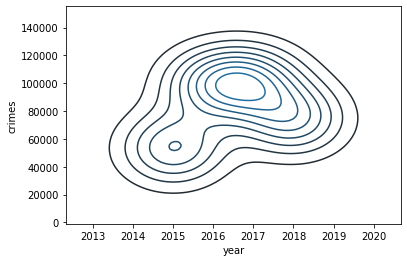

In [17]:
sns.kdeplot(crimes_year_groupby.year, crimes_year_groupby.crimes)

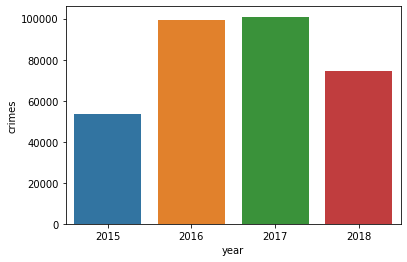

In [18]:
sns.barplot(x = "year", y = "crimes", data = crimes_year_groupby)

# Crimes per Month

In [19]:
crimes_per_month = pd.DataFrame()
crimes_per_month['month'] = data['MONTH'].values
crimes_per_month['crimes'] = data['INCIDENT_NUMBER'].values

In [20]:
crimes_per_month.groupby(['month']).count()

crimes
month        
1       23625
2       21661
3       24156
4       24108
5       26242
6       30622
7       34640
8       35137
9       34023
10      26437
11      23685
12      23484

In [21]:
crimes_month_groupby = pd.DataFrame(crimes_per_month.groupby(['month']).count())
crimes_month_groupby = crimes_month_groupby.reset_index()
crimes_month_groupby

month  crimes
0       1   23625
1       2   21661
2       3   24156
3       4   24108
4       5   26242
5       6   30622
6       7   34640
7       8   35137
8       9   34023
9      10   26437
10     11   23685
11     12   23484

# The month that most crimes happen appears to be August
In August 35137 types of crimes happened. Second place is July with 34640 crimes and then September follows with 304023 crimes. As a result of our research, we can accept that summer months are not very safe.

In [22]:
crimes_month_groupby.max()

month        12
crimes    35137
dtype: int64

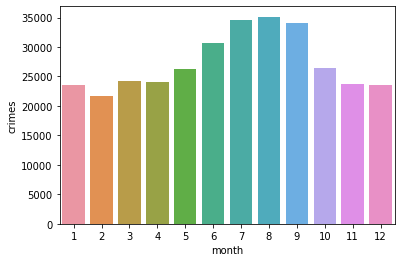

In [23]:
sns.barplot(x = "month", y = "crimes", data = crimes_month_groupby)

# Crimes per Day

In [24]:
crimes_per_day = pd.DataFrame()
crimes_per_day['day'] = data['DAY_OF_WEEK'].values
crimes_per_day['crime'] = data['INCIDENT_NUMBER'].values

In [25]:
crimes_per_day.groupby(['day']).count()

crime
day             
Friday     49758
Monday     46970
Saturday   45969
Sunday     41374
Thursday   47872
Tuesday    47726
Wednesday  48151

# The day that most crimes happen is Friday
After Friday, we have Wednesday and Thursday.

In [26]:
crimes_day_groupby = pd.DataFrame(crimes_per_day.groupby(['day']).count())
crimes_day_groupby['day'] = crimes_day_groupby.index

In [27]:
crimes_day_groupby.max()

crime        49758
day      Wednesday
dtype: object

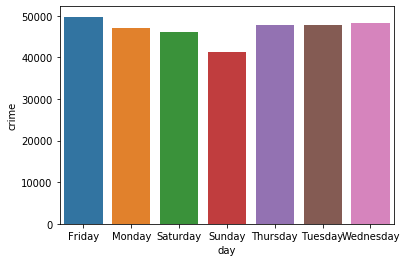

In [28]:
sns.barplot(x = "day", y = "crime", data = crimes_day_groupby)

# Crimes per District

In [29]:
crimes_per_district = pd.DataFrame()
crimes_per_district['district'] = data['DISTRICT']
crimes_per_district['crime'] = data['INCIDENT_NUMBER']

In [30]:
crimes_per_district.groupby(['district']).count()

crime
district       
A1        36735
A15        6663
A7        13634
B2        51288
B3        36400
C11       43817
C6        24190
D14       20632
D4        43338
E13       17981
E18       17825
E5        13543

In [31]:
crimes_district_groupby = pd.DataFrame(crimes_per_district.groupby(['district']).count())
crimes_district_groupby = crimes_district_groupby.reset_index()

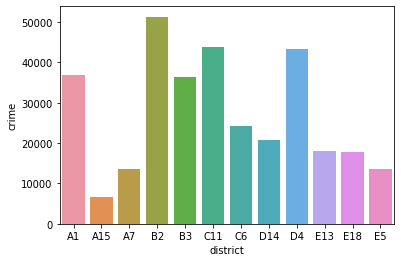

In [32]:
sns.barplot(x = "district", y = "crime", data = crimes_district_groupby)

# Year with most shootings

In [33]:
shootings = data['SHOOTING'].tolist()
year = data['YEAR'].tolist()
shootings_hold = []
shootings_list = []
year_list = []

for i in range(len(shootings)):
    if shootings[i] == 'Y':
        shootings_list.append(i)   #here we hold the index where the row that we want appears in order to optimize the complexity 
        shootings_hold.append(shootings[i])
print(len(shootings_list))
for j in range(len(shootings_list)):
    year_list.append(year[shootings_list[j]])

1055


In [34]:
shootings_df = pd.DataFrame()
shootings_df['year'] = year_list
shootings_df['shootings'] = shootings_hold
shootings_df.groupby(['year']).count()

shootings
year           
2015        185
2016        279
2017        371
2018        220

# The year that holds the title for most shootings is 2017

In [35]:
shootings_groupby = pd.DataFrame(shootings_df.groupby(['year']).count())
shootings_groupby = shootings_groupby.reset_index()
shootings_groupby.max()

year         2018
shootings     371
dtype: int64

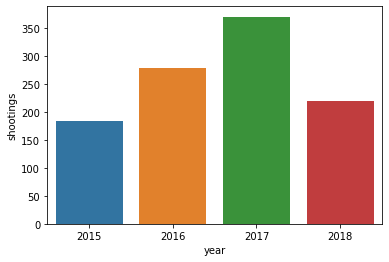

In [36]:
sns.barplot(x = "year", y = "shootings", data = shootings_groupby)

# District with more shootings

In [37]:
district = data['DISTRICT'].tolist()
district_list = []

for k in range(len(shootings_list)):
    district_list.append(district[shootings_list[k]])
district_list

['C11',
 'C11',
 'B2',
 'B3',
 'B3',
 'E13',
 'B2',
 'B2',
 'B2',
 'B2',
 'D4',
 'E13',
 'C11',
 'B2',
 'D4',
 'D4',
 'B2',
 'B2',
 'C11',
 'C11',
 'E13',
 'E13',
 'B3',
 'C11',
 'C11',
 'C11',
 'B3',
 'B3',
 'E18',
 'E18',
 'B2',
 'B2',
 'B2',
 'A15',
 'A15',
 'D4',
 'B3',
 'D14',
 'C11',
 'C11',
 'B3',
 'B2',
 'B2',
 'B3',
 'B3',
 'C6',
 'D14',
 'E13',
 'E13',
 'B3',
 'C11',
 'E5',
 'B3',
 'B3',
 'B3',
 'B3',
 'B3',
 'D4',
 'E18',
 'B3',
 'B3',
 'E13',
 'E13',
 'E13',
 'B2',
 'B3',
 'D4',
 'B2',
 'B2',
 'B2',
 'C11',
 'C11',
 'B2',
 'B2',
 'B2',
 'B2',
 'B2',
 'B2',
 'B2',
 'E18',
 'D14',
 'D14',
 'D14',
 'D14',
 'D14',
 'D14',
 'B3',
 'C11',
 'C11',
 'B2',
 'B2',
 'B2',
 'B2',
 'B2',
 'B2',
 'E18',
 'B2',
 'B2',
 'B2',
 'B3',
 'B2',
 'B2',
 'B2',
 'B2',
 'B3',
 'B3',
 'B3',
 'B3',
 'B3',
 'C11',
 'C11',
 'C11',
 'A7',
 'A7',
 'A7',
 'A7',
 'A7',
 'C11',
 'C11',
 'C11',
 'C11',
 'C11',
 'C11',
 'C11',
 'C11',
 'C11',
 'B3',
 'B3',
 'B2',
 'B2',
 'B2',
 'B2',
 'B2',
 'B2',
 'E13',
 'B

In [38]:
districts_df = pd.DataFrame()
districts_df['districts'] = district_list
districts_df['shootings'] = shootings_hold
districts_df.groupby(['districts']).count()

shootings
districts           
A1                12
A15                5
A7                17
B2               352
B3               227
C11              195
C6                41
D14               21
D4                59
E13               70
E18               35
E5                19

# The most dangerous district is B2

In [39]:
districts_groupby = pd.DataFrame(districts_df.groupby(['districts']).count())
districts_groupby = districts_groupby.reset_index()
districts_groupby.max()

districts     E5
shootings    352
dtype: object

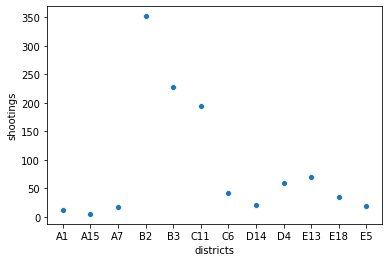

In [40]:
sns.scatterplot(x="districts", y="shootings", data=districts_groupby)

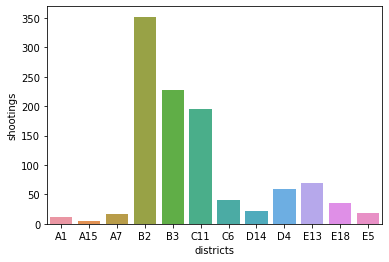

In [41]:
sns.barplot(x = "districts", y = "shootings", data = districts_groupby)

# Adding the column 'Day or Night' to our dataframe

In [42]:
data['Day or Night'] = 'none'
data.head()

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
0      I182080058          2403  Disorderly Conduct   
1      I182080053          3201       Property Lost   
2      I182080052          2647               Other   
3      I182080051           413  Aggravated Assault   
4      I182080050          3122            Aircraft   

              OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
0            DISTURBING THE PEACE      E18            495        N   
1                 PROPERTY - LOST      D14            795        N   
2       THREATS TO DO BODILY HARM       B2            329        N   
3  ASSAULT - AGGRAVATED - BATTERY       A1             92        N   
4              AIRCRAFT INCIDENTS       A7             36        N   

      OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART  \
0  2018-10-03 20:13:00  2018     10   Wednesday    20    Part Two   
1  2018-08-30 20:00:00  2018      8    Thursday    20  Part Three   
2  2018-10-03 19:20:00  2018     10   Wednesday    19    Part Two   
3  2018-10-03 20:00:00  2018     10   Wednesday    20    Part One   
4  2018-10-03 20:49:00  2018     10   Wednesday    20  Part Three   

         STREET        Lat       Long                     Location  \
0  ARLINGTON ST  42.262608 -71.121186  (42.26260773, -71.12118637)   
1    ALLSTON ST  42.352111 -71.135311  (42.35211146, -71.13531147)   
2      DEVON ST  42.308126 -71.076930  (42.30812619, -71.07692974)   
3  CAMBRIDGE ST  42.359454 -71.059648  (42.35945371, -71.05964817)   
4   PRESCOTT ST  42.375258 -71.024663  (42.37525782, -71.02466343)   

  Day or Night  
0         none  
1         none  
2         none  
3         none  
4         none

In [43]:
data['Day or Night'].dtype

dtype('O')

In [44]:
data['HOUR'].dtype

dtype('int32')

# Checking if it is day or night when the most crimes occur

In [45]:
data_day_or_night = []

In [46]:
for row in data['HOUR']:
    if row > 16 or row < 6:
        data_day_or_night.append("Night")
    else:
        data_day_or_night.append("Day")

In [47]:
data['Day or Night'] = data_day_or_night

In [48]:
day_or_night= pd.DataFrame()
day_or_night['day or night'] = data['Day or Night']
day_or_night['crime'] = data['INCIDENT_NUMBER']
day_or_night = pd.DataFrame(day_or_night.groupby(['day or night']).count())
day_or_night = day_or_night.reset_index()

In [49]:
day_or_night

day or night   crime
0          Day  168092
1        Night  159728

# Most crimes happen in the morning hours

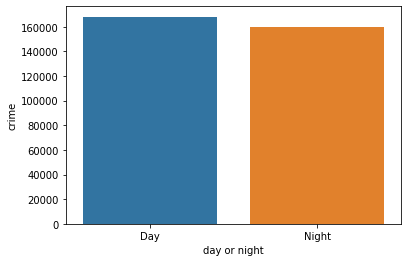

In [50]:
sns.barplot(x = "day or night", y = "crime", data = day_or_night)

# Most frequent crime in the morning hours

In [51]:
day = data['Day or Night'].tolist()
offense = data['OFFENSE_CODE_GROUP'].tolist()
day_hold = []
day_list = []
offense_list = []
for i in range(len(day)):
    if day[i] == 'Day':
        day_list.append(i)

In [52]:
for j in range(len(day_list)):
    offense_list.append(offense[day_list[j]])
offense_list

['Investigate Person',
 'Vandalism',
 'Liquor Violation',
 'Auto Theft',
 'Investigate Person',
 'Property Lost',
 'Larceny',
 'Auto Theft',
 'Larceny',
 'Investigate Person',
 'Investigate Person',
 'Larceny',
 'Investigate Person',
 'Recovered Stolen Property',
 'Vandalism',
 'Larceny',
 'Motor Vehicle Accident Response',
 'Larceny',
 'Investigate Property',
 'Investigate Person',
 'Larceny',
 'Property Lost',
 'Residential Burglary',
 'Auto Theft',
 'Motor Vehicle Accident Response',
 'Medical Assistance',
 'Medical Assistance',
 'Aggravated Assault',
 'Larceny',
 'Drug Violation',
 'Restraining Order Violations',
 'Larceny',
 'Property Found',
 'Investigate Person',
 'Medical Assistance',
 'Harassment',
 'Other',
 'Motor Vehicle Accident Response',
 'Property Lost',
 'Vandalism',
 'Harassment',
 'Larceny',
 'Simple Assault',
 'Missing Person Reported',
 'Drug Violation',
 'Medical Assistance',
 'Confidence Games',
 'Motor Vehicle Accident Response',
 'Warrant Arrests',
 'Drug Viola

In [53]:
crime_morning = pd.DataFrame()
crime_morning['crimes'] = offense_list
crime_morning['count'] = 'none'
crime_morning = pd.DataFrame(crime_morning.groupby(['crimes']).count())

In [54]:
crime_morning = crime_morning.reset_index()
crime_morning

crimes  count
0                 Aggravated Assault   3240
1                           Aircraft     20
2                              Arson     38
3   Assembly or Gathering Violations    293
4                         Auto Theft   2145
..                               ...    ...
62                             Towed   8151
63                         Vandalism   6845
64                   Verbal Disputes   6165
65                        Violations   3106
66                   Warrant Arrests   4884

[67 rows x 2 columns]

# The Motor Vehicle Accident Response is the most frequent

In [55]:
crime_morning.max()

crimes    Warrant Arrests
count               20076
dtype: object

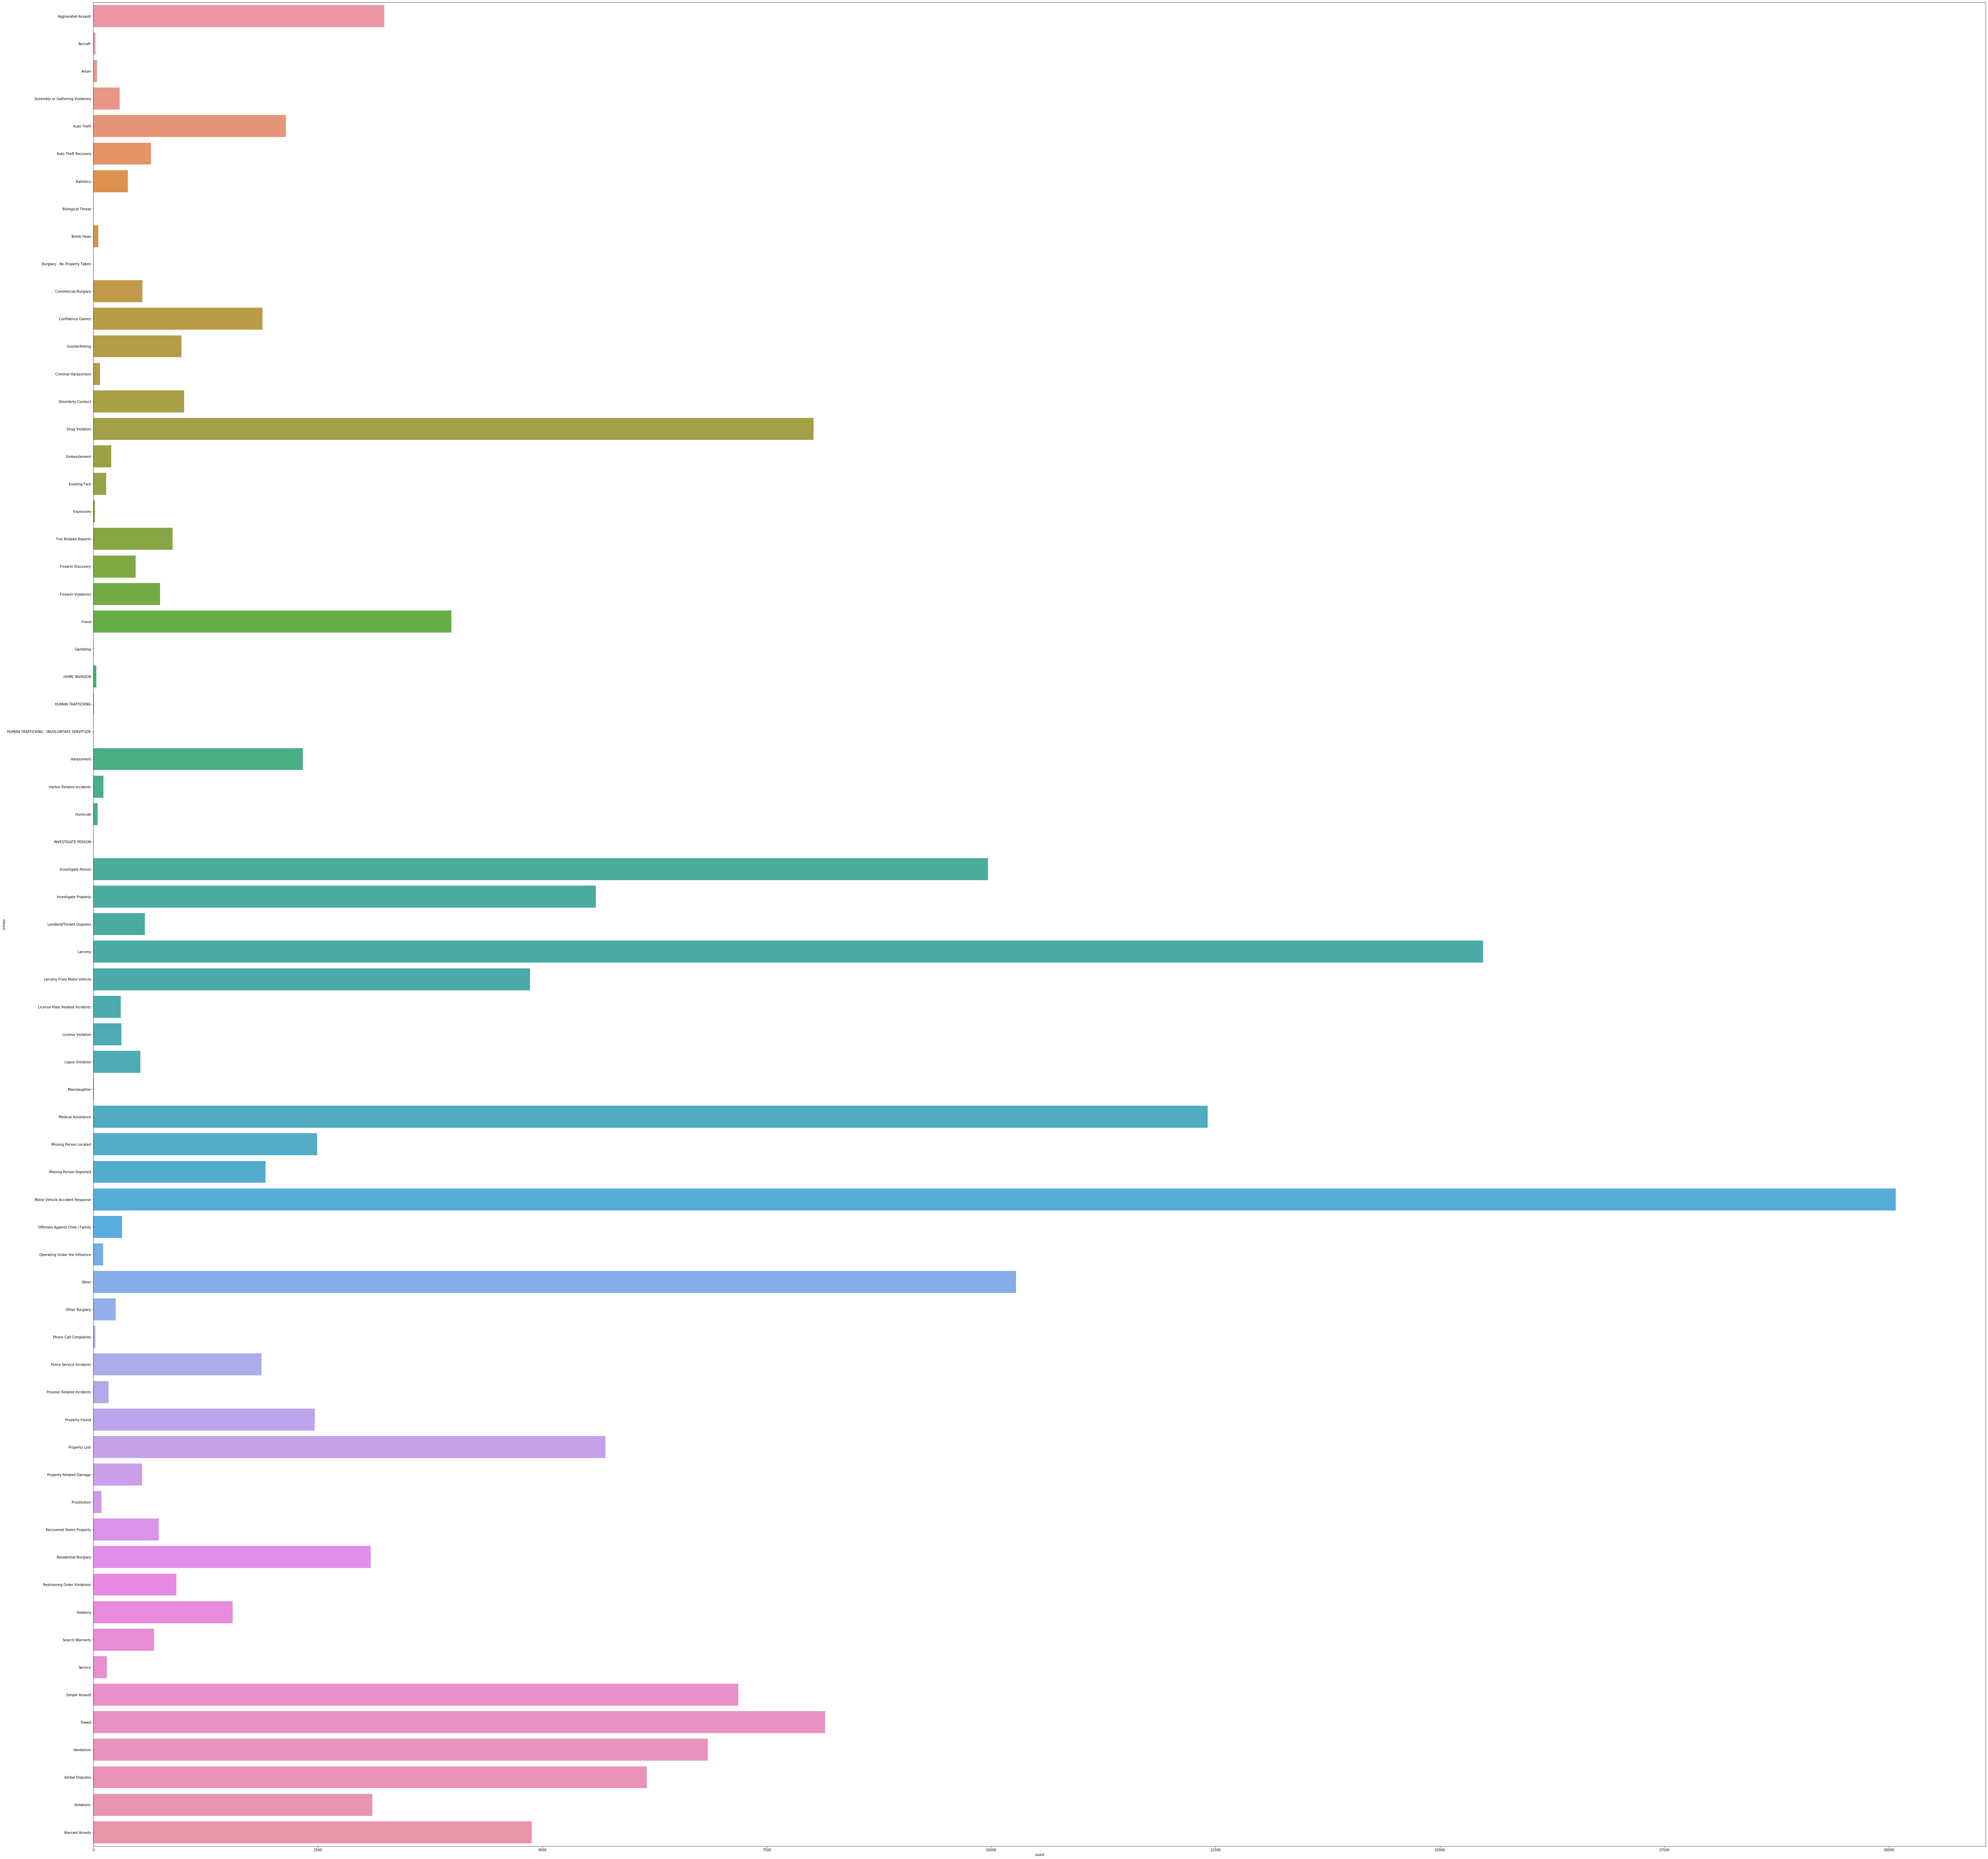

In [56]:
from matplotlib import pyplot
a4_dims = (100, 100)
ax = pyplot.subplots(figsize=a4_dims)
ax = sns.barplot(x = "count", y = "crimes", data = crime_morning)

In order to focus more on the accident that really happens the most of them all, we have chopped the crime_morning and have taken only six items, the maximum item included.

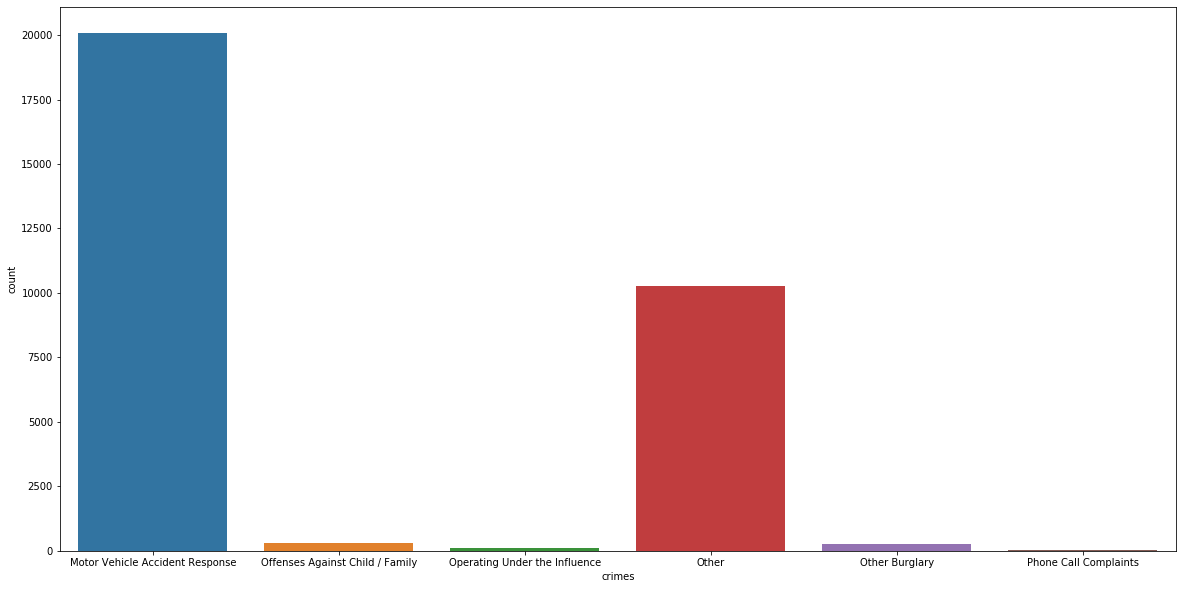

In [57]:
crime_morning = crime_morning[43:]
crime_morning = crime_morning[:6]
crime_morning
a4_dims = (20, 10)
ax = pyplot.subplots(figsize=a4_dims)
ax = sns.barplot(x = "crimes", y = "count", data = crime_morning)

# Kmeans for 2 Clusters and data = ['Lat','Long']

Below we can see the scatterplots of the 2,3,4 & 5-centered clusters using the columns for latitude and Longtitude. Thus, we can see the concentration of crimes in dependance with their geographical location in the city of Boston.
To begin with, we read the two columns we need ['Lat','Long'] from our dataframe where we have all our data stored. From these, we select all the locations with Latitude > 40 and Longtitude < 60. Then, we call the kmeans algorithm, in order to create our clustres and we continue by calling fit() function for our data, making the prediction for our clusters (no matter their number) and finding the cluster centers. Also, we create for each new cluster a new dataframe where we store the labels created and the data we have used. In the end, we draw the scatterplot for the visual represantation, using the afforementioned dataframe created with the help of myKmeans function. 

In [58]:
#K means Clustering (if argument nclust is not defined, kmeans will make by default 2 clusters)
def myKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

location = pd.DataFrame(data,columns=['Lat','Long'])
location = location.dropna()
location = location.loc[(location['Lat'] > 40) & (location['Long'] < -60)]
X2 = np.array(location)   #for the kmeans to work, we need a kmeans array
clust_labels, cent = myKmeans(X2, 2)
kmeans2 = pd.DataFrame(clust_labels)
location.insert((X2.shape[1]),'kmeans',kmeans2)
#print(cent)

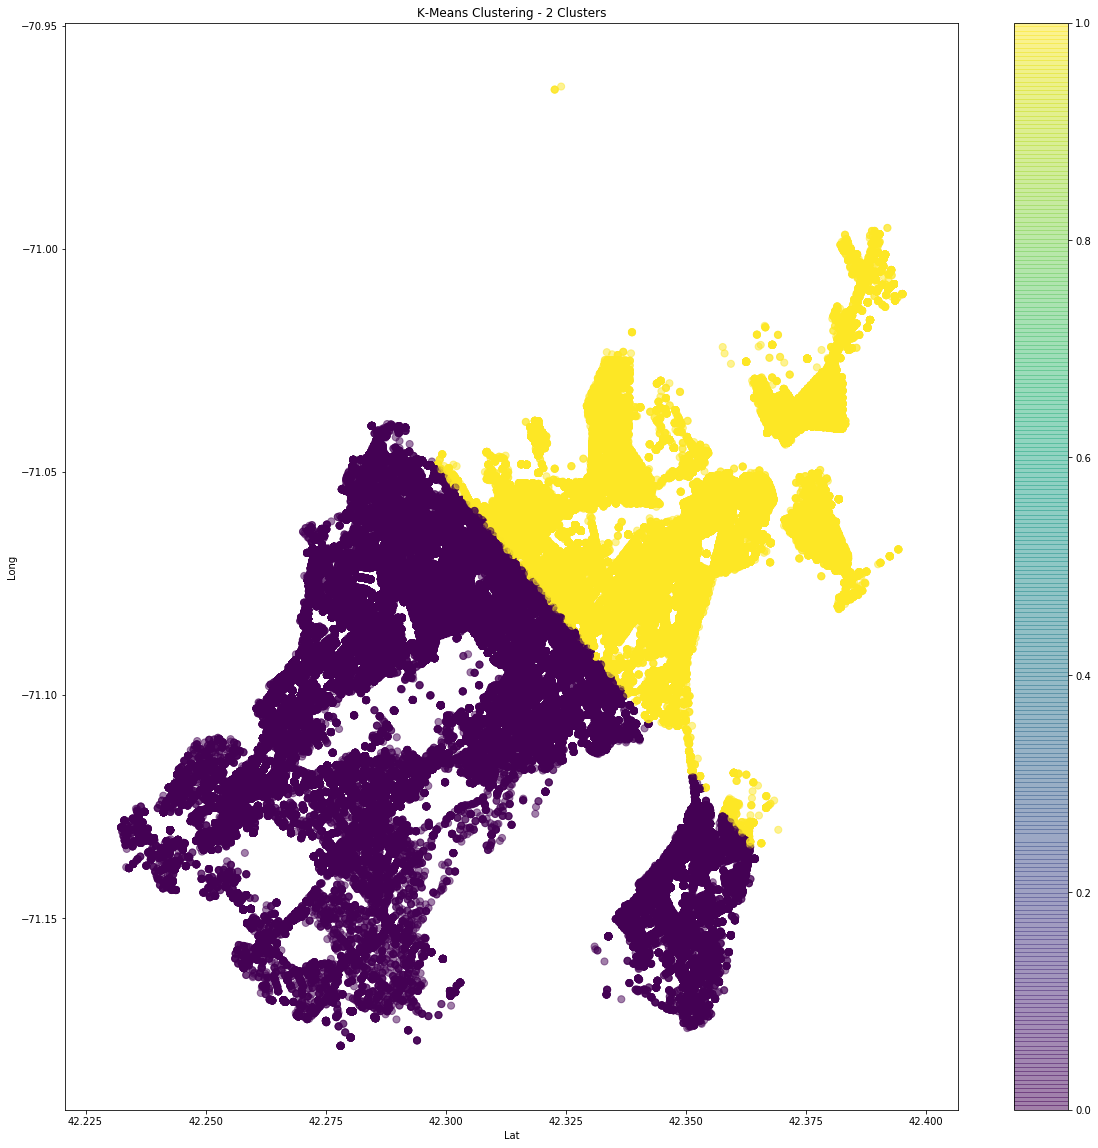

In [59]:
#Plot the clusters obtained using k means
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(location['Lat'],location['Long'],c=kmeans2[0],s=50, alpha=0.5)
ax.set_title('K-Means Clustering - 2 Clusters')
ax.set_xlabel('Lat')
ax.set_ylabel('Long')
plt.colorbar(scatter)

# Kmeans for 3 Clusters and data = ['Lat','Long']


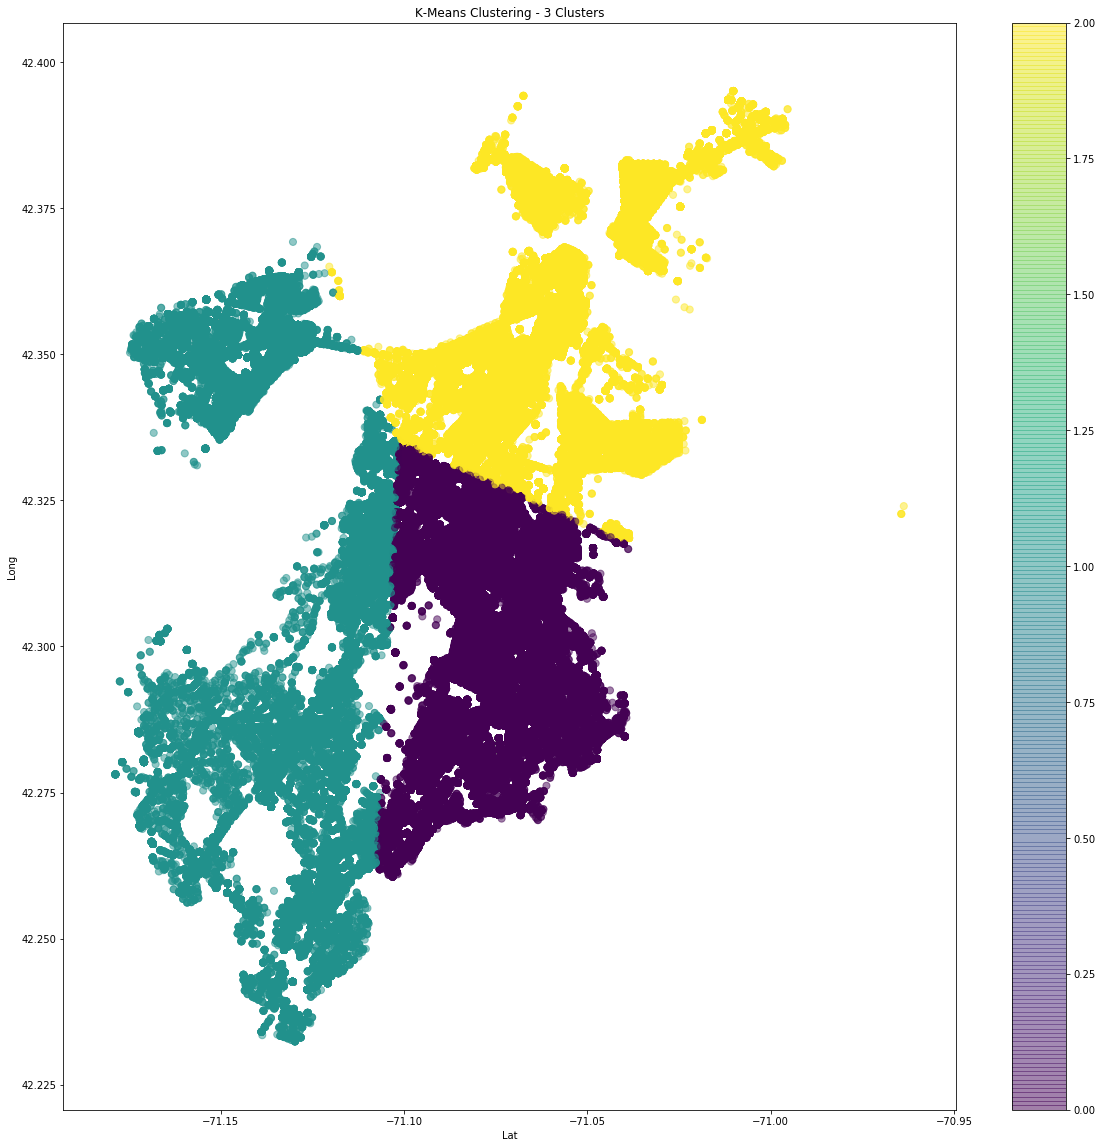

In [60]:
#with 3 clusters
clust_labels, cent = myKmeans(X2, 3)
kmeans3 = pd.DataFrame(clust_labels)
location.insert((X2.shape[1]),'kmeans3',kmeans3)

#Plot the clusters obtained using k means
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(location['Long'],location['Lat'],c=kmeans3[0],s=50, alpha=0.5)
ax.set_title('K-Means Clustering - 3 Clusters')
ax.set_xlabel('Lat')
ax.set_ylabel('Long')
plt.colorbar(scatter)

In [61]:
cent 

array([[ 42.30234386, -71.07756491],
       [ 42.30702602, -71.1301527 ],
       [ 42.35061952, -71.06395409]])

# Kmeans for 4 Clusters and data = ['Lat','Long']


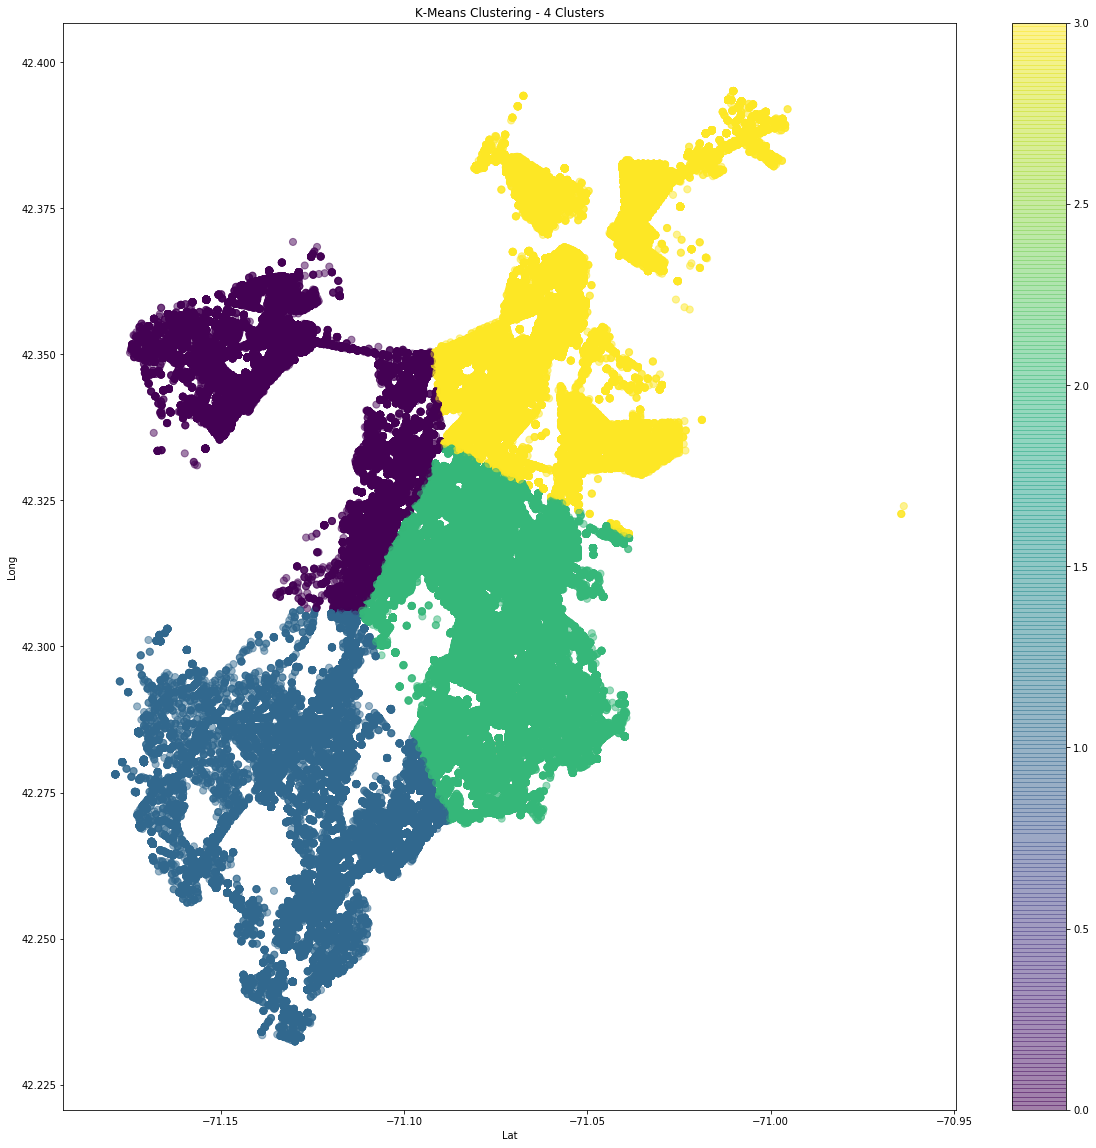

In [62]:
#with 4 clusters
clust_labels, cent = myKmeans(X2, 4)
kmeans4 = pd.DataFrame(clust_labels)
location.insert((X2.shape[1]),'kmeans4',kmeans4)

#Plot the clusters obtained using k means
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(location['Long'],location['Lat'],c=kmeans4[0],s=50, alpha=0.5)
ax.set_title('K-Means Clustering - 4 Clusters')
ax.set_xlabel('Lat')
ax.set_ylabel('Long')
plt.colorbar(scatter)

In [63]:
cent

array([[ 42.34041056, -71.12150578],
       [ 42.2720907 , -71.12384815],
       [ 42.30439593, -71.0758796 ],
       [ 42.3520052 , -71.06107865]])

# Kmeans for 5 Clusters and data = ['Lat','Long']


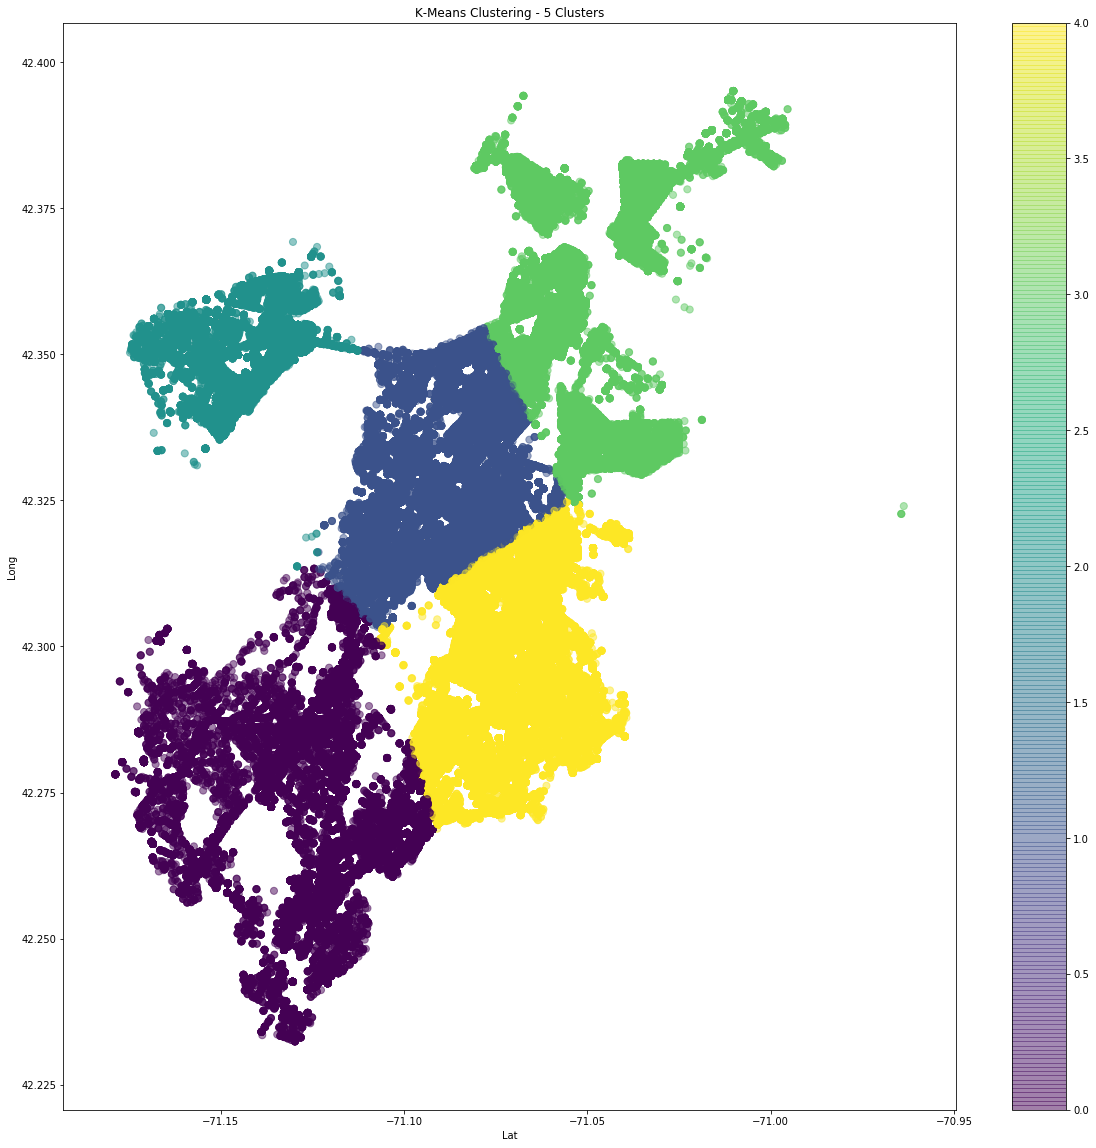

In [64]:
#with 5 clusters
clust_labels, cent = myKmeans(X2, 5)
kmeans5 = pd.DataFrame(clust_labels)
location.insert((X2.shape[1]),'kmeans5',kmeans5)

#Plot the clusters obtained using k means
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(location['Long'],location['Lat'],c=kmeans5[0],s=50, alpha=0.5)
ax.set_title('K-Means Clustering - 5 Clusters')
ax.set_xlabel('Lat')
ax.set_ylabel('Long')
plt.colorbar(scatter)

In [65]:
cent

array([[ 42.27243059, -71.12521499],
       [ 42.33151796, -71.08685416],
       [ 42.35054218, -71.14312353],
       [ 42.35741717, -71.05333705],
       [ 42.29765673, -71.07233764]])

# Scatterplot examples from the presentation given

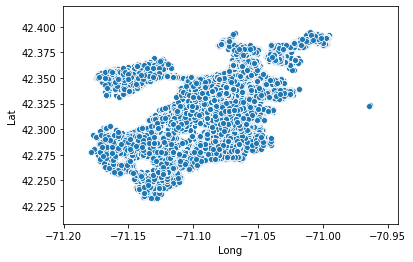

In [66]:
location = pd.DataFrame(data,columns=['Lat','Long'])
location = location.dropna()
location = location.loc[(location['Lat'] > 40) & (location['Long'] < -60)]

ax = sns.scatterplot(x="Long",y="Lat", data = location)



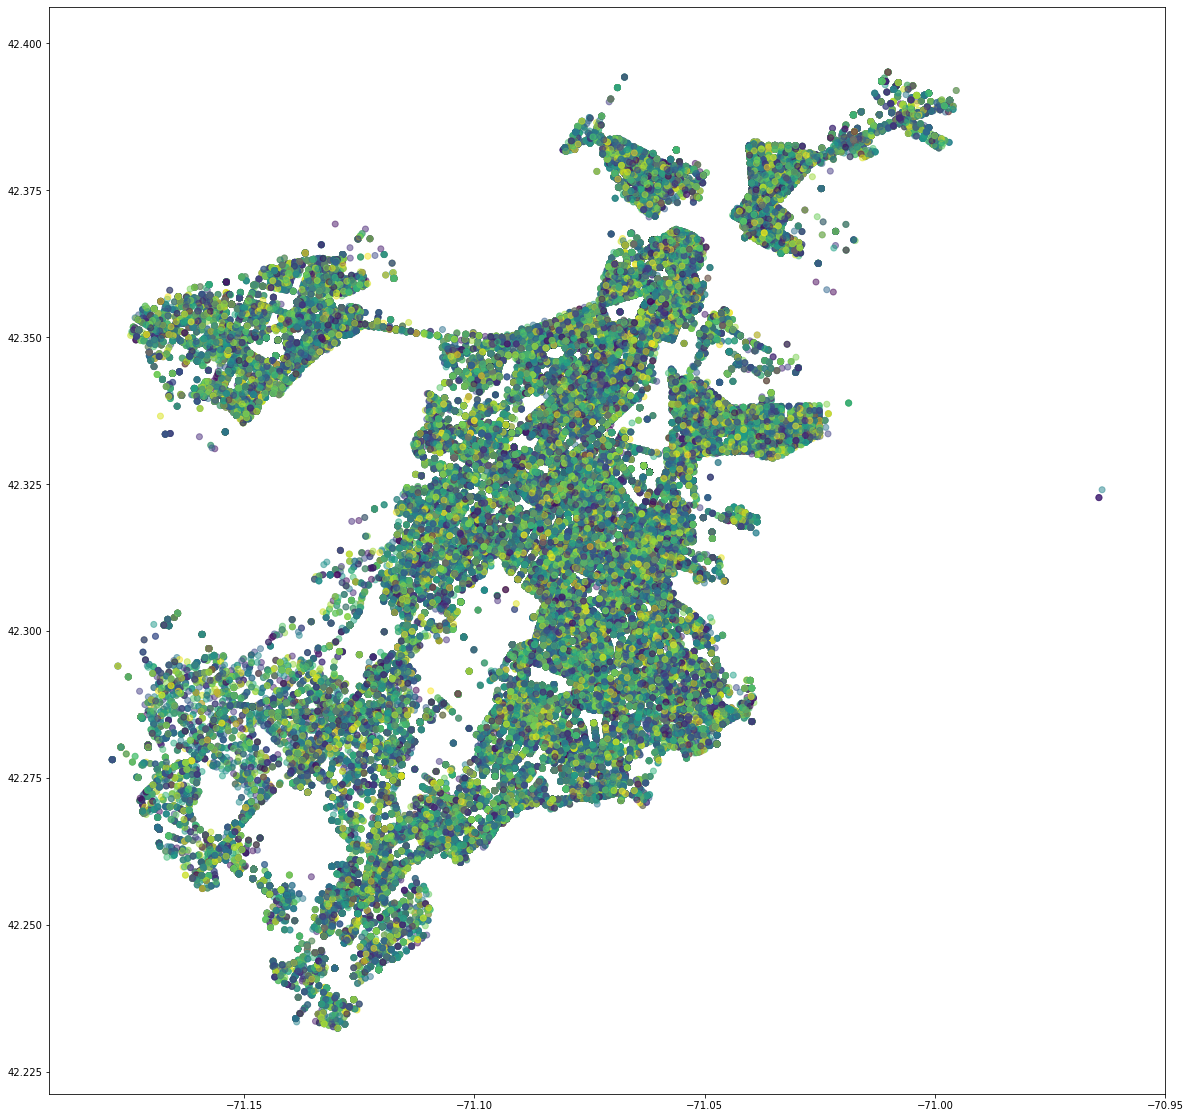

In [67]:
x = location['Long']
y = location['Lat']

colors = np.random.rand(len(location))

plt.figure(figsize = (20,20))
plt.scatter(x,y,c=colors,alpha=0.5)
plt.show()

# Kmeans for 2 Clusters and data = ['Lat','Long','OFFENCE_CODE']


The visualization of the data in this case was made with the Axes3D from the python library mpl_toolkits.mplot3d, as it was given in the example of the presentation we were given. 
In this scenario, we are dealing with 3 different variables that characterize each crime, thus we choose the 3D presentation of the clustering over the 2D one. The Kmeans is used in the same exact way as above.

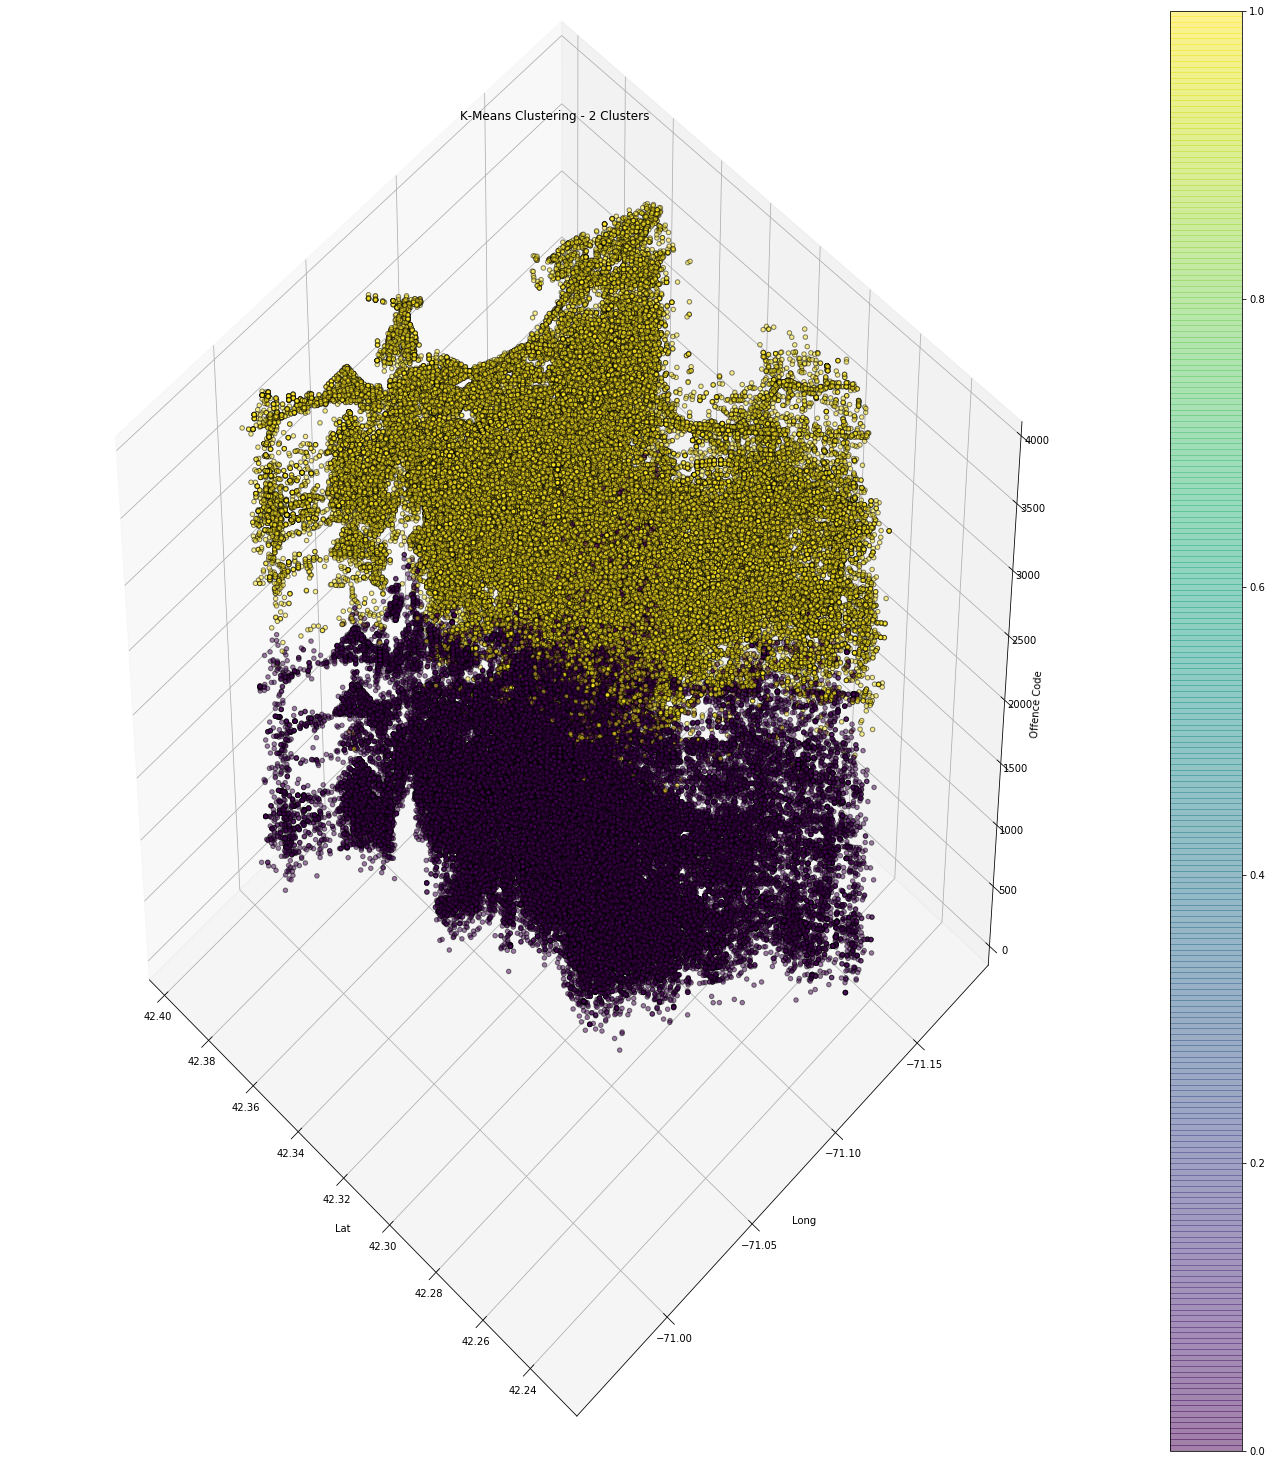

In [68]:
#with 2 clusters
from mpl_toolkits.mplot3d import Axes3D
cluster_data = pd.DataFrame(data,columns=['Lat','Long','OFFENSE_CODE'])
cluster_data = cluster_data.dropna()
cluster_data = cluster_data.loc[(cluster_data['Lat'] > 40) & (cluster_data['Long'] < -60)]
X = np.array(cluster_data)
clust_labels, cent = myKmeans(X, 2)
kmeans = pd.DataFrame(clust_labels)
cluster_data.insert((X.shape[1]),'kmeans',kmeans)

#Plot the clusters obtained using k means
fig = plt.figure(figsize=(20,20))
#ax = fig.add_subplot(111)
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
scatter = ax.scatter(cluster_data['Lat'],cluster_data['Long'],cluster_data['OFFENSE_CODE'],c=kmeans[0],s=20, alpha=0.5,edgecolor='k')
ax.set_title('K-Means Clustering - 2 Clusters')
ax.set_xlabel('Lat')
ax.set_ylabel('Long')
ax.set_zlabel('Offence Code')
plt.colorbar(scatter)

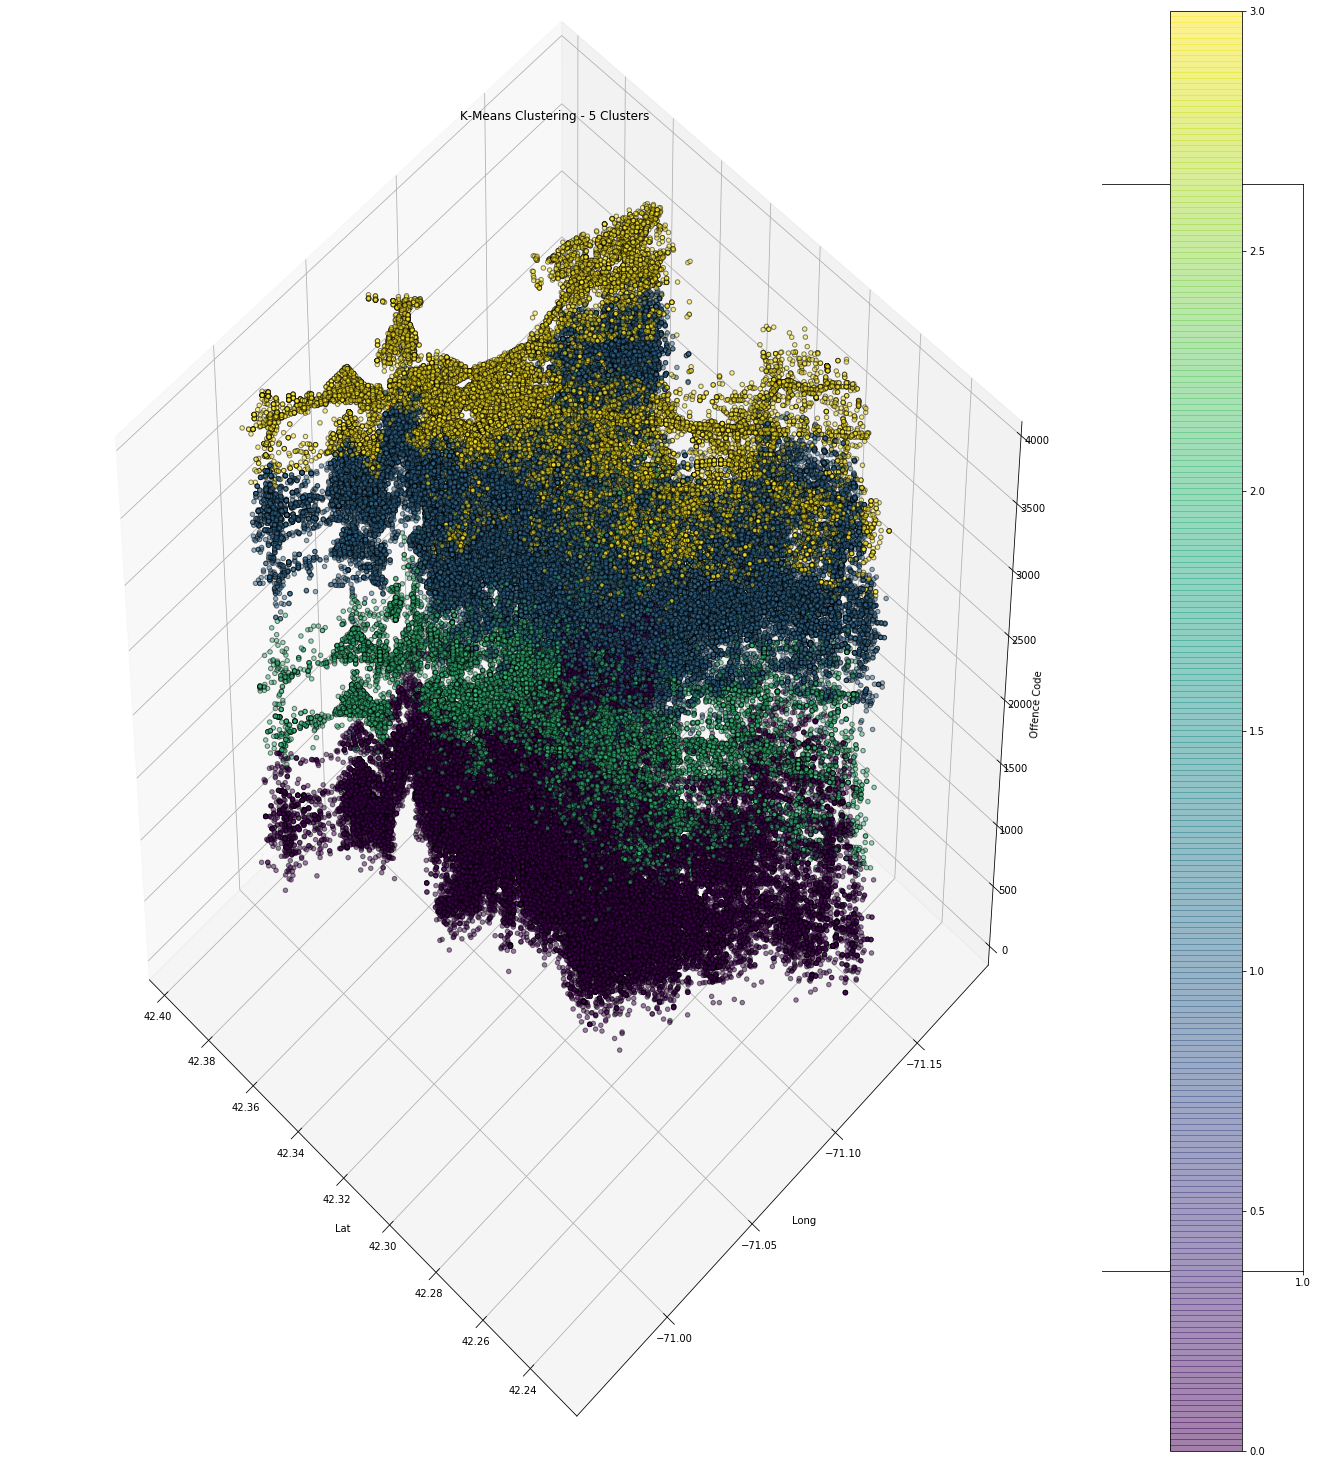

In [69]:
#with 4 clusters and data['Lat','Long','OFFENSE_CODE']
clust_labels, cent = myKmeans(X, 4)
kmeans4 = pd.DataFrame(clust_labels)
cluster_data.insert((X.shape[1]),'kmeans4',kmeans4)

#Plot the clusters obtained using k means
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
scatter = ax.scatter(cluster_data['Lat'],cluster_data['Long'],cluster_data['OFFENSE_CODE'],c=kmeans4[0],s=20, alpha=0.5,edgecolor='k')
ax.set_title('K-Means Clustering - 5 Clusters')
ax.set_xlabel('Lat')
ax.set_ylabel('Long')
ax.set_zlabel('Offence Code')
plt.colorbar(scatter)

# Kmeans for 2 Clusters and data = ['Lat','Long','MONTH']


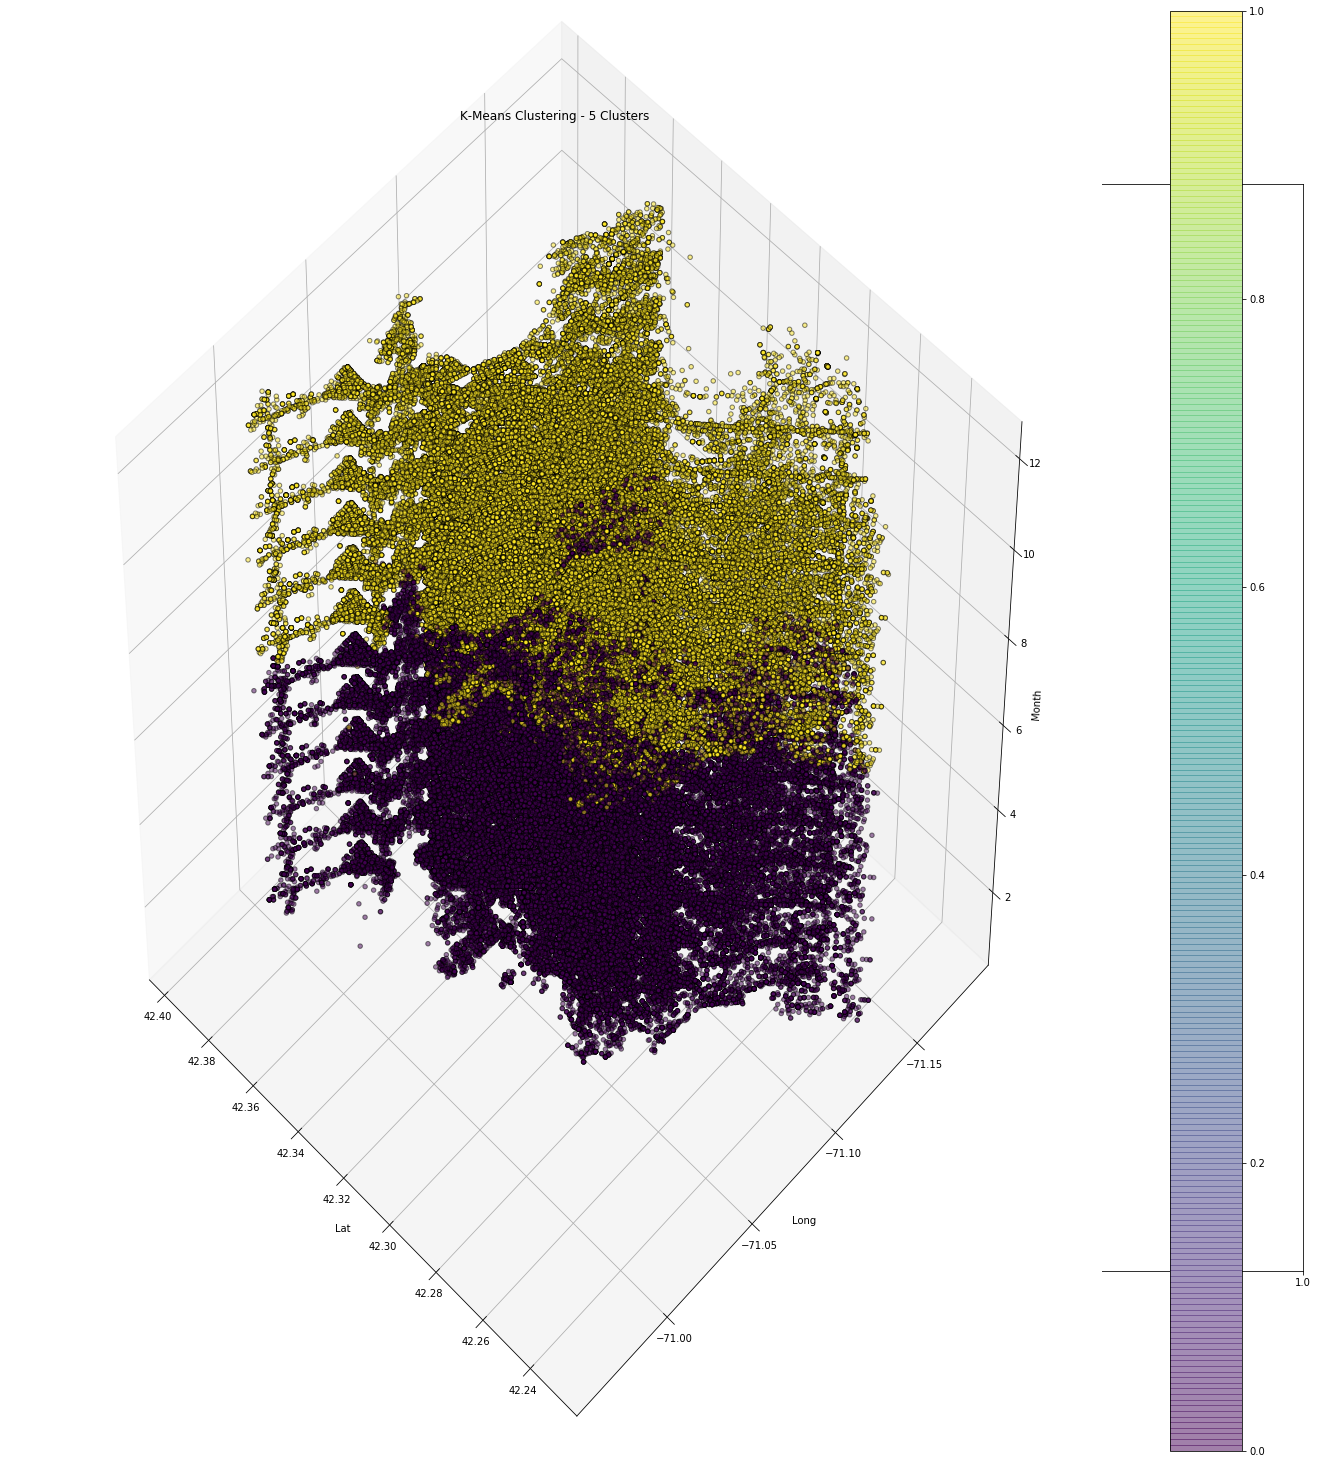

In [70]:
#with 2 clusters and data['Lat','Long','MONTH']
from mpl_toolkits.mplot3d import Axes3D
cluster_data = pd.DataFrame(data,columns=['Lat','Long','MONTH'])
cluster_data = cluster_data.dropna()
cluster_data = cluster_data.loc[(cluster_data['Lat'] > 40) & (cluster_data['Long'] < -60)]
X = np.array(cluster_data)
clust_labels, cent = myKmeans(X, 2)
kmeans = pd.DataFrame(clust_labels)
cluster_data.insert((X.shape[1]),'kmeans',kmeans)

#Plot the clusters obtained using k means
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
scatter = ax.scatter(cluster_data['Lat'],cluster_data['Long'],cluster_data['MONTH'],c=kmeans[0],s=20, alpha=0.5,edgecolor='k')
ax.set_title('K-Means Clustering - 5 Clusters')
ax.set_xlabel('Lat')
ax.set_ylabel('Long')
ax.set_zlabel('Month')
plt.colorbar(scatter)

# Kmeans for 5 Clusters and data = ['Lat','Long','MONTH']


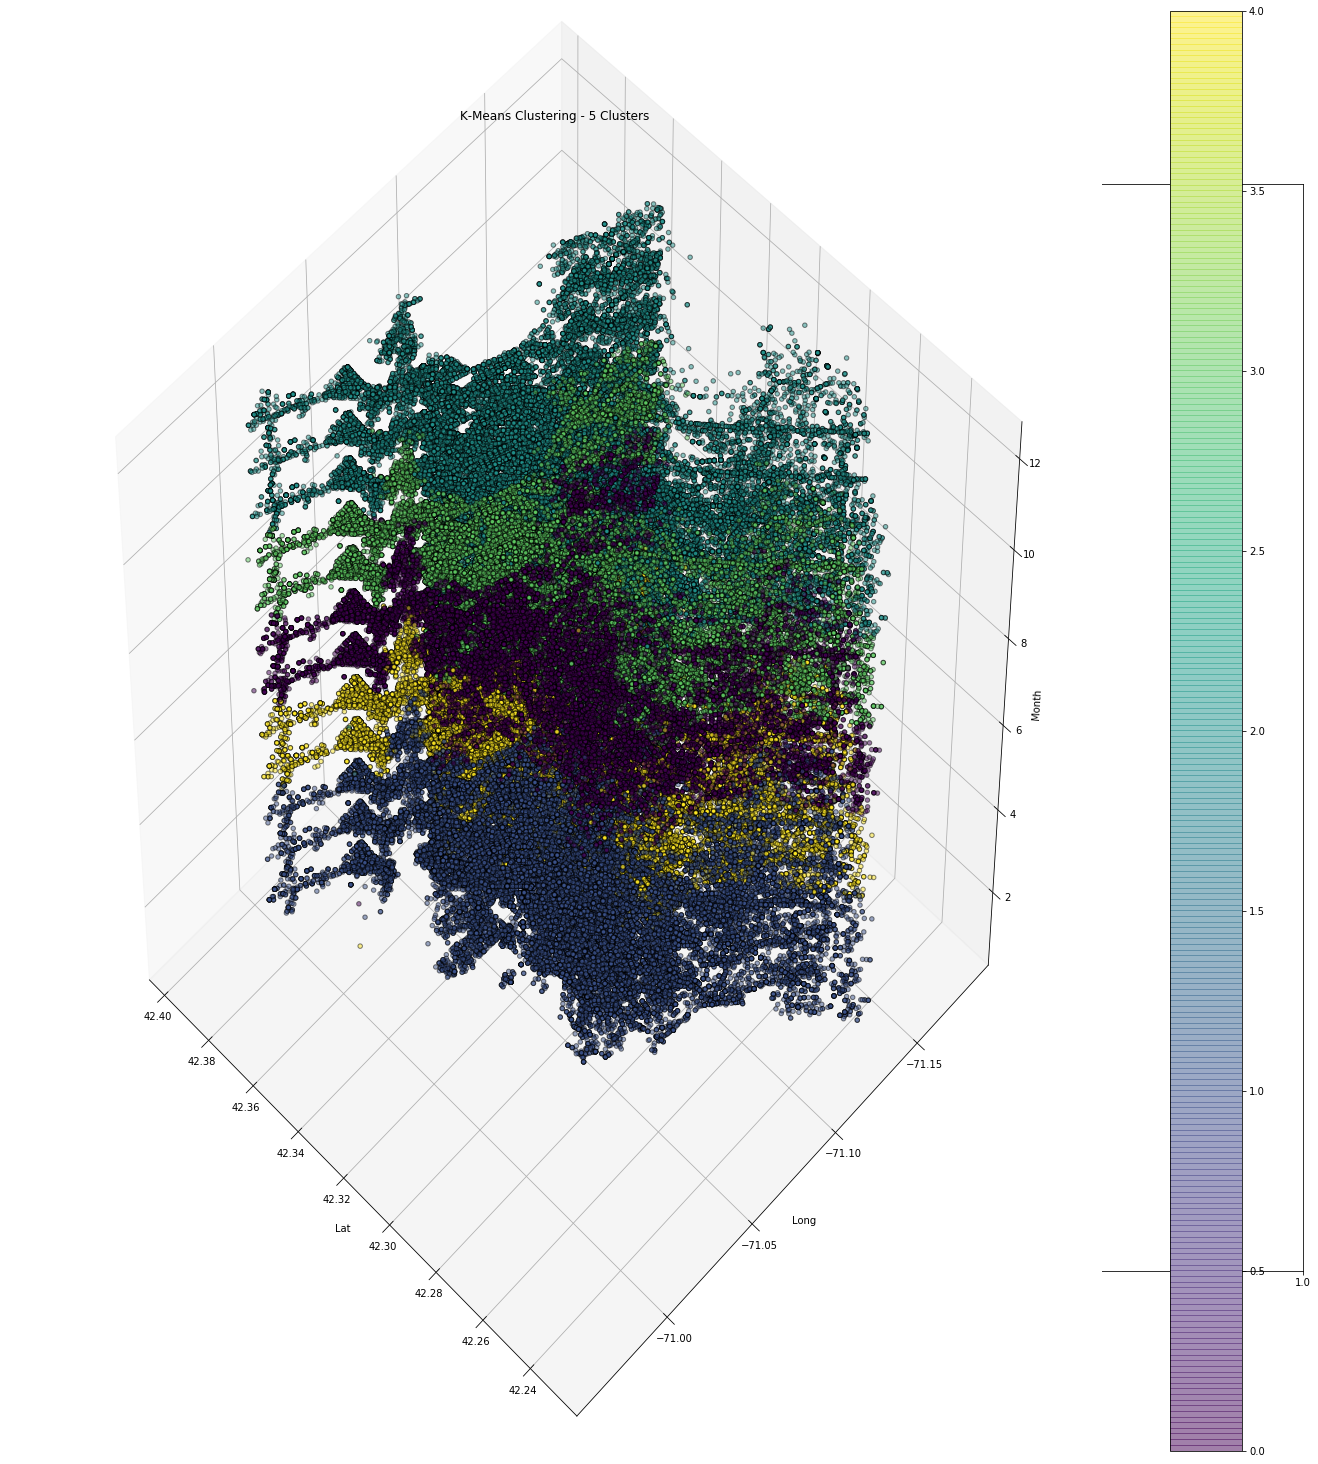

In [71]:
#with 5 clusters and data['Lat','Long','MONTH']
clust_labels, cent = myKmeans(X, 5)
kmeans5 = pd.DataFrame(clust_labels)
cluster_data.insert((X.shape[1]),'kmeans5',kmeans5)

#Plot the clusters obtained using k means
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
scatter = ax.scatter(cluster_data['Lat'],cluster_data['Long'],cluster_data['MONTH'],c=kmeans5[0],s=20, alpha=0.5,edgecolor='k')
ax.set_title('K-Means Clustering - 5 Clusters')
ax.set_xlabel('Lat')
ax.set_ylabel('Long')
ax.set_zlabel('Month')
plt.colorbar(scatter)

# Bonus part
The map below shows with markers the areas that the crime with Offense code : 'Drug Violation' has been recorded.
In our case, we need all the rows that have the condition below.

In [73]:
import folium
data = data.loc[data.OFFENSE_CODE_GROUP == 'Drug Violation']

Here we create a list of lists that holds the 'Lat' and 'Long'. After that we choose a location to add to the map, this is a random choice.

In [74]:
locations = data[['Lat', 'Long']]
locationlist = locations.values.tolist()
locationlist[7]

[42.3260975, -71.06755796]

In [75]:
print(len(locationlist))

17037


In [77]:
from folium.plugins import MarkerCluster
map1 = folium.Map(location=[42.3260975, -71.06755796], tiles='Stamen Terrain', zoom_start=11)
#marker_cluster = MarkerCluster().add_to(map)
map1

If we print our locationlist , we will notice that it contains nans.We want to remove those nans to create the map, else an error will occur.
We decided that when we will find nans we will replace them with float 0.0 . 

In [78]:
import math
for i in range(len(locationlist)):
    for j in range(len(locationlist[i])):
        if math.isnan(locationlist[i][j]):
            locationlist[i][j] = 0.0
print(locationlist)

[[42.31694189, -71.10394558], [42.32784724, -71.0793868], [42.37081805, -71.03929078], [42.38630618, -71.00772965], [42.35254597, -71.05981712], [42.33130578, -71.07194742], [42.35241815, -71.06525499], [42.3260975, -71.06755796], [42.28813676, -71.09475747], [42.33794261, -71.05184093], [42.33428841, -71.07239518], [42.32483301, -71.10164757], [42.32483301, -71.10164757], [42.36183857, -71.05976489], [42.36183857, -71.05976489], [0.0, 0.0], [0.0, 0.0], [42.33280882, -71.06729226], [42.33280882, -71.06729226], [42.338214, -71.057034], [0.0, 0.0], [42.33367922, -71.09187755], [42.31082341, -71.07267019], [42.35602373, -71.06177615], [0.0, 0.0], [0.0, 0.0], [42.3523119, -71.0637051], [42.3523119, -71.0637051], [0.0, 0.0], [0.0, 0.0], [42.34210486, -71.08118057], [42.3322228, -71.07167184], [42.3322228, -71.07167184], [42.32754043, -71.06598386], [42.33176796, -71.07182739], [42.33176796, -71.07182739], [42.3833514, -71.07894124], [0.0, 0.0], [42.33130578, -71.07194742], [42.31679542, -71

This is a plain marker method.If the user click on the red markers they will also show him the district.

In [79]:
data_popup = data['DISTRICT'].values.tolist()
for k in range(100):
    folium.Marker(locationlist[k],popup=data_popup[k],icon=folium.Icon(color='red')).add_to(map1)
map1

It is important to mention that we did not add all the data information but we have a sample.
Here we have the clusters method too. You can zoom in for more information.

In [80]:
from folium.plugins import MarkerCluster
map2 = folium.Map(location=[42.3260975, -71.06755796], tiles='CartoDB dark_matter', zoom_start=11)

marker_cluster = MarkerCluster().add_to(map2)

for point in range(0, 200):
    folium.Marker(locationlist[point], popup=data_popup[point]).add_to(marker_cluster)
map2